### CNN for images

What is convolution?
A convolution is a mathematical operation on two functions f and g that produces a third function that expresses how the shape of one is modified by the other. The convolution operation is also known as the sliding dot product or the inner product.

In a convolution layer, we slide a filter over the input image and perform element-wise multiplication and summation. The filter is also called a kernel. The filter is a small matrix that is used to extract features from the input image. The filter is usually a square matrix with an odd number of rows and columns. The filter is also called a kernel.

Lets look at mathematics of convolution:
If the input size is (N, C, H, W) and the filter size is (F, C, HH, WW), then the output size is (N, F, H', W') where H' and W' are given by:

H' = 1 + (H + 2P - HH) / S

W' = 1 + (W + 2P - WW) / S

N is the batch size, C is the number of channels, H is the height of the input, and W is the width of the input. F is the number of filters, HH is the height of the filter, and WW is the width of the filter. P is the padding size, and S is the stride size. Notice that the output size is independent of number of channels in the input image. This is because the filter is applied to each channel independently.

Stride is the number of pixels by which the filter is moved right or down at each step. Padding is the number of pixels that are added to the input image on all sides. Padding is usually used to preserve the size of the input image.

The number of parameters in a convolution layer is given by:

F * C * HH * WW + F

F is the number of filters, C is the number of channels, HH is the height of the filter, and WW is the width of the filter. The + F is for the bias term.

 Each filter actually happens to be a collection of kernels, with there being one kernel for every single input channel to the layer, and each kernel being unique. Each of the per-channel processed versions are then summed together to form one channel. The kernels of a filter each produce one version of each channel, and the filter as a whole produces one overall output channel.

The way the bias term works here is that each output filter has one bias term. The bias gets added to the output channel so far to produce the final output channel.

Following are the kernels usually used in CNNs :
(along with their dimensions, number of parameters, and the number of channels they produce, their usage in table format)

- Identity kernel (1x1x1x1, 1 parameter, 1 channel, used for identity mapping):
Example of identity kernel:
[[[1]]]

- Horizontal edge detection kernel (3x3x1x1, 9 parameters, 1 channel, used for edge detection)
Example of horizontal edge detection kernel:
[[[-1, -2, -1],
  [0, 0, 0],
  [1, 2, 1]]]

- Vertical edge detection kernel (3x3x1x1, 9 parameters, 1 channel, used for edge detection)
Example of vertical edge detection kernel:
[[[-1, 0, 1],
  [-2, 0, 2],
  [-1, 0, 1]]]

- Edge detection kernels (3x3x1x1, 9 parameters, 1 channel, used for edge detection)
Example of edge detection kernels:
[[[-1, -1, -1],
  [-1, 8, -1],
  [-1, -1, -1]]]

- Sharpening kernel (3x3x1x1, 9 parameters, 1 channel, used for sharpening)
Example of sharpening kernel:
[[[0, -1, 0],
  [-1, 5, -1],
  [0, -1, 0]]]

- Smoothing kernel (3x3x1x1, 9 parameters, 1 channel, used for smoothing)
Example of smoothing kernel:
[[[1/9, 1/9, 1/9],
  [1/9, 1/9, 1/9],
  [1/9, 1/9, 1/9]]]

- Gaussian blur kernel (5x5x1x1, 25 parameters, 1 channel, used for Gaussian blur)
Example of Gaussian blur kernel:
[[[1/256, 4/256, 6/256, 4/256, 1/256],
  [4/256, 16/256, 24/256, 16/256, 4/256],
  [6/256, 24/256, 36/256, 24/256, 6/256],
  [4/256, 16/256, 24/256, 16/256, 4/256],
  [1/256, 4/256, 6/256, 4/256, 1/256]]]

- Sobel kernels (3x3x1x2, 18 parameters, 2 channels, used for edge detection)
Example of Sobel kernels:
Horizontal Sobel kernel:
[[[-1, -2, -1],
  [0, 0, 0],
  [1, 2, 1]]]

Vertical Sobel kernel:
[[[-1, 0, 1],
  [-2, 0, 2],
  [-1, 0, 1]]]

- Scharr kernels (3x3x1x2, 18 parameters, 2 channels, used for edge detection)
Example of Scharr kernels:
Horizontal Scharr kernel:
[[[-3, -10, -3],
  [0, 0, 0],
  [3, 10, 3]]]

Vertical Scharr kernel:
[[[-3, 0, 3],
  [-10, 0, 10],
  [-3, 0, 3]]]

- Prewitt kernels (3x3x1x2, 18 parameters, 2 channels, used for edge detection)
Example of Prewitt kernels:
Horizontal Prewitt kernel:
[[-1, -1, -1],
  [0, 0, 0],
  [1, 1, 1]]

Vertical Prewitt kernel:
[[-1, 0, 1],
  [-1, 0, 1],
  [-1, 0, 1]]

- Laplacian of Gaussian kernel (5x5x1x1, 25 parameters, 1 channel, used for edge detection)
Example of Laplacian of Gaussian kernel:
[[[0, 0, -1, 0, 0],
  [0, -1, -2, -1, 0],
  [-1, -2, 16, -2, -1],
  [0, -1, -2, -1, 0],
  [0, 0, -1, 0, 0]]]

- Harris corner detection kernel (5x5x1x1, 25 parameters, 1 channel, used for Harris corner detection)
Example of Harris corner detection kernel:
[[[2, 4, 5, 4, 2],
  [4, 9, 12, 9, 4],
  [5, 12, 15, 12, 5],
  [4, 9, 12, 9, 4],
  [2, 4, 5, 4, 2]]]


- Canny edge detection kernels (5x5x1x2, 50 parameters, 2 channels, used for Canny edge detection)
Example of Canny edge detection kernels:
Horizontal Canny edge detection kernel:
[[[-1, -2, 0, 2, 1],
  [-4, -8, 0, 8, 4],
  [-6, -12, 0, 12, 6],
  [-4, -8, 0, 8, 4],
  [-1, -2, 0, 2, 1]]]

In [29]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision
import torch.autograd as autograd
import torchtext
import torchvision.transforms as transforms
import torchdata.datapipes as dp
from torchdata.datapipes.iter import IterableWrapper, IterDataPipe
import torch.optim as optim
from torchinfo import summary
import tqdm
import numpy as np
import matplotlib.pyplot as plt
import copy

In [21]:
device = torch.device("cuda" if torch.cuda.is_available() else "mps" if torch.has_mps else "cpu")
# device = torch.device("cpu")
device

device(type='mps')

In [3]:
# import MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='../../../pytorch_learning/data',
                                            train=True,
                                            transform=torchvision.transforms.ToTensor(),
                                            download=False)

test_dataset = torchvision.datasets.MNIST(root='../../../pytorch_learning/data',
                                            train=False,
                                            transform=torchvision.transforms.ToTensor(),
                                            download=False)                                            


In [4]:
# Build a data loader. Push the data to the GPU

train_loader = DataLoader(dataset=train_dataset,
                            batch_size=64,  # batch size
                            shuffle=True)  # shuffle the data

test_loader = DataLoader(dataset=test_dataset,
                            batch_size=64,  # batch size
                            shuffle=False)  # shuffle the data

##### Training, Validation functions


In [6]:
# function for training one epoch

def train_one_epoch(net, train_loader, criterion, optimizer):
    """
    Train the network for one epoch on device
    Prints the loss as well as  accuracy every 50 batches
    returns total loss and accuracy
    """
    net.train()
    total_loss = 0
    correct = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device = device), target.to(device= device)
        output = net(data).to(device = device)
        loss = criterion(output, target)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        correct_batch = torch.sum(torch.max(output, 1)[1] == target).item()
        correct += correct_batch
        if batch_idx % 300 == 0:
            print('Train batch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f} \taccuracy {}/{} ({:.0f}%)'.format(
                batch_idx, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item(),
                correct_batch, len(data),
                100. * correct_batch / (len(data))))
    total_loss /= len(train_loader.dataset)
    print('Train Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format( total_loss, correct, len(train_loader.dataset),
                100. * correct / len(train_loader.dataset)))
    return total_loss, correct / len(train_loader.dataset)


# validation function
def validate(net, val_loader, criterion):
    """
    Validate the network
    Prints the loss as well as  accuracy.
    Returns total loss and accuracy
    """
    net.eval()
    total_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in val_loader:
            data, target = data.to(device), target.to(device)
            output = net(data).to(device)
            total_loss += criterion(output, target).item()  # sum up batch loss
            correct += torch.sum(torch.max(output, 1)[1] == target).item()
    total_loss /= len(val_loader.dataset)
    print('Validation Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format( total_loss, correct, len(val_loader.dataset),100. * correct / len(val_loader.dataset)))
    return total_loss, correct/len(val_loader.dataset)

In [7]:
# function to train the network for n epochs and validate after each epoch

def train(net, train_loader, val_loader, criterion, optimizer, n_epochs):
    """
    Train the network for n epochs and validate after each epoch.
    Store the loss and accuracy for each epoch and return them
    """
    # print the device used as well as specifications of the device
    print('Training on device: {}'.format(device))
    print('Training for {} epochs'.format(n_epochs))

    train_loss = []
    train_acc = []
    val_loss = []
    val_acc = []
    for epoch in range(n_epochs):
        print('Epoch {}/{}'.format(epoch, n_epochs - 1))
        print('-' * 10)
        epoch_train_loss,epoch_acc = train_one_epoch(net, train_loader, criterion, optimizer)
        train_loss.append(epoch_train_loss)
        train_acc.append(epoch_acc)
        epoch_val_loss,epoch_val_acc = validate(net, val_loader, criterion)
        val_loss.append(epoch_val_loss)
        val_acc.append(epoch_val_acc)
        print()
    return train_loss, train_acc, val_loss, val_acc

#### i. Linear models

In [32]:
class LinearNet1(nn.Module):
    def __init__(self, num_classes):
        super(LinearNet1, self).__init__()
        # and our second linear layer takes 50 to the num_classes
        # flatten layer to flatten the input from 28x28 to 784
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(784, 50)
        self.fc2 = nn.Linear(50, num_classes)

    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        # We don't apply softmax here because it is included in the loss function nn.CrossEntropyLoss()
        return x # outputs are logits (not probabilities). Dimension: batch_size x num_classes

model = LinearNet1(num_classes=10).to(device)

#summary(model, input_size=(1,1, 28, 28))

In [33]:
summary(copy.deepcopy(model), input_size=(1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
LinearNet1                               [1, 10]                   --
├─Flatten: 1-1                           [1, 784]                  --
├─Linear: 1-2                            [1, 50]                   39,250
├─Linear: 1-3                            [1, 10]                   510
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
Total mult-adds (M): 0.04
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.16
Estimated Total Size (MB): 0.16

In [34]:
num_epochs = 5

# Loss and optimizer
criterion = nn.CrossEntropyLoss() # This already applies softmax
optimizer = optim.Adam(model.parameters(), lr=0.001)

# train the network
train_loss, train_acc, val_loss, val_acc = train(model, train_loader, test_loader, criterion, optimizer, num_epochs)

Training on device: mps
Training for 5 epochs
Epoch 0/4
----------
Train batch: 0 [0/60000 (0%)]	Loss: 2.306701 	accuracy 5/64 (8%)
Train batch: 300 [19200/60000 (32%)]	Loss: 0.242516 	accuracy 59/64 (92%)
Train batch: 600 [38400/60000 (64%)]	Loss: 0.371653 	accuracy 57/64 (89%)
Train batch: 900 [57600/60000 (96%)]	Loss: 0.211883 	accuracy 59/64 (92%)
Train Average loss: 0.0066, Accuracy: 53404/60000 (89%)

Validation Average loss: 0.0038, Accuracy: 9306/10000 (93%)


Epoch 1/4
----------
Train batch: 0 [0/60000 (0%)]	Loss: 0.182664 	accuracy 60/64 (94%)
Train batch: 300 [19200/60000 (32%)]	Loss: 0.157867 	accuracy 61/64 (95%)
Train batch: 600 [38400/60000 (64%)]	Loss: 0.114002 	accuracy 62/64 (97%)
Train batch: 900 [57600/60000 (96%)]	Loss: 0.137767 	accuracy 61/64 (95%)
Train Average loss: 0.0032, Accuracy: 56533/60000 (94%)

Validation Average loss: 0.0028, Accuracy: 9480/10000 (95%)


Epoch 2/4
----------
Train batch: 0 [0/60000 (0%)]	Loss: 0.136377 	accuracy 61/64 (95%)
Train batc

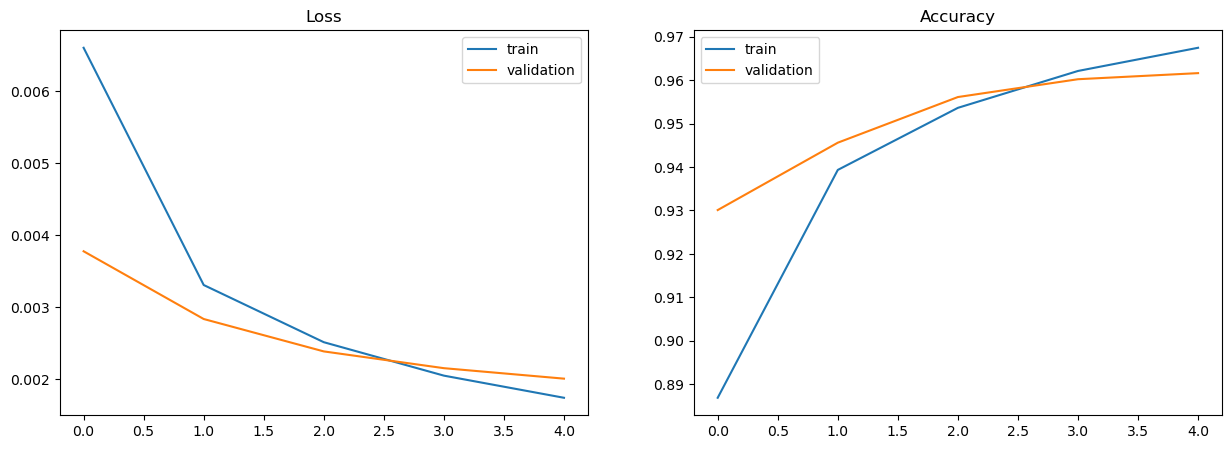

In [10]:
# plot the loss and accuracy curves as subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.plot(train_loss, label='train')
ax1.plot(val_loss, label='validation')
ax1.set_title('Loss')
ax1.legend()

ax2.plot(train_acc, label='train')
ax2.plot(val_acc, label='validation')
ax2.set_title('Accuracy')
ax2.legend()

In [35]:
# model 2

class LinearNet2(nn.Module):
    def __init__(self):
        super(LinearNet2, self).__init__()
        self.flatten = nn.Flatten()
        self.fc = nn.Linear(784, 10)
        self.log_softmax = nn.LogSoftmax(dim=1)
        # log softmax is used because it is numerically more stable than softmax. 
        # Softmax implementation is not stable for large values
        
    def forward(self, x):
        x = self.flatten(x)
        x = self.fc(x)
        x = self.log_softmax(x)
        return x # outputs are log softmax (not probabilities). Dimension: batch_size x num_classes

model = LinearNet2().to(device)

#summary(model, input_size=(1,1, 28, 28))

In [38]:
summary(copy.deepcopy(model), input_size=(1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
LinearNet2                               [1, 10]                   --
├─Flatten: 1-1                           [1, 784]                  --
├─Linear: 1-2                            [1, 10]                   7,850
├─LogSoftmax: 1-3                        [1, 10]                   --
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
Total mult-adds (M): 0.01
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.03
Estimated Total Size (MB): 0.03

In [37]:
num_epochs = 5

# Loss and optimizer
criterion = nn.NLLLoss() # since we are using log_softmax
optimizer = optim.Adam(model.parameters(), lr=0.001)

# train the network
train_loss, train_acc, val_loss, val_acc = train(model, train_loader, test_loader, criterion, optimizer, num_epochs)

Training on device: mps
Training for 5 epochs
Epoch 0/4
----------
Train batch: 0 [0/60000 (0%)]	Loss: 2.320020 	accuracy 8/64 (12%)
Train batch: 300 [19200/60000 (32%)]	Loss: 0.496063 	accuracy 53/64 (83%)
Train batch: 600 [38400/60000 (64%)]	Loss: 0.429224 	accuracy 55/64 (86%)
Train batch: 900 [57600/60000 (96%)]	Loss: 0.333491 	accuracy 56/64 (88%)
Train Average loss: 0.0085, Accuracy: 52158/60000 (87%)

Validation Average loss: 0.0052, Accuracy: 9113/10000 (91%)


Epoch 1/4
----------
Train batch: 0 [0/60000 (0%)]	Loss: 0.356039 	accuracy 58/64 (91%)
Train batch: 300 [19200/60000 (32%)]	Loss: 0.244246 	accuracy 59/64 (92%)
Train batch: 600 [38400/60000 (64%)]	Loss: 0.310601 	accuracy 55/64 (86%)
Train batch: 900 [57600/60000 (96%)]	Loss: 0.243839 	accuracy 61/64 (95%)
Train Average loss: 0.0050, Accuracy: 54680/60000 (91%)

Validation Average loss: 0.0046, Accuracy: 9173/10000 (92%)


Epoch 2/4
----------
Train batch: 0 [0/60000 (0%)]	Loss: 0.246904 	accuracy 59/64 (92%)
Train bat

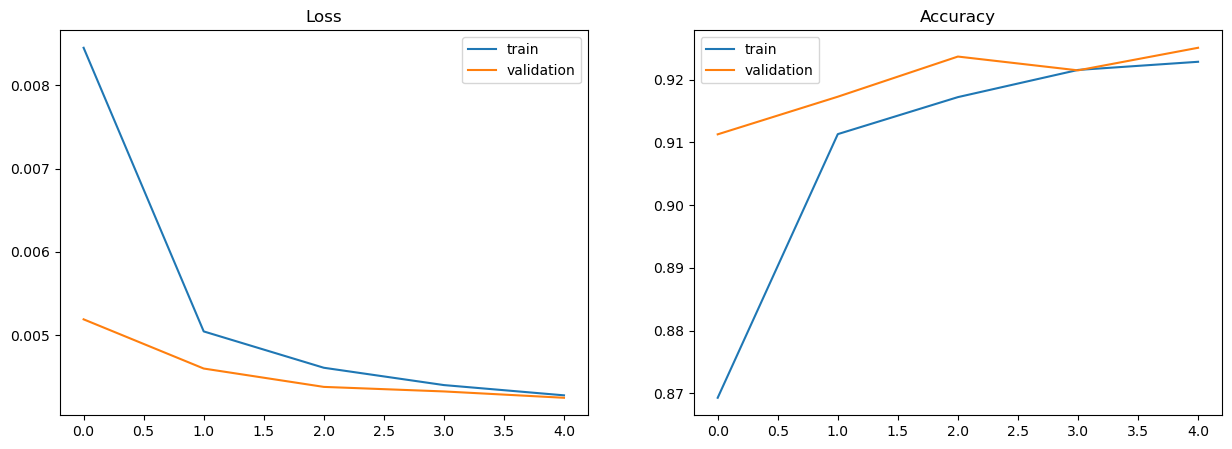

In [39]:
# plot the loss and accuracy curves as subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.plot(train_loss, label='train')
ax1.plot(val_loss, label='validation')
ax1.set_title('Loss')
ax1.legend()

ax2.plot(train_acc, label='train')
ax2.plot(val_acc, label='validation')
ax2.set_title('Accuracy')
ax2.legend()

#### ii. Simple CNN model

In [40]:
class OneConv(nn.Module):
    """ 
    A simple convolutional neural network with one convolutional layer
    """
    def __init__(self):
        super(OneConv, self).__init__()
        self.conv = nn.Conv2d(in_channels=1,out_channels=9,kernel_size=(5,5)) # by default stride=1, padding=0
        self.flatten = nn.Flatten()
        self.fc = nn.Linear(5184,10)

    def forward(self, x):
        x = nn.functional.relu(self.conv(x))
        x = self.flatten(x)
        x = nn.functional.log_softmax(self.fc(x),dim=1)
        return x

model = OneConv().to(device)

In [42]:
summary(copy.deepcopy(model), input_size=(1, 1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
OneConv                                  [1, 10]                   --
├─Conv2d: 1-1                            [1, 9, 24, 24]            234
├─Flatten: 1-2                           [1, 5184]                 --
├─Linear: 1-3                            [1, 10]                   51,850
Total params: 52,084
Trainable params: 52,084
Non-trainable params: 0
Total mult-adds (M): 0.19
Input size (MB): 0.00
Forward/backward pass size (MB): 0.04
Params size (MB): 0.21
Estimated Total Size (MB): 0.25

- in_channels - number of input channels. In our case we are dealing with a grayscale image, thus number of input channels is 1. Color image has 3 channels (RGB).
- out_channels - number of filters to use. We will use 9 different filters, which will give the network plenty of opportunities to explore which filters work best for our scenario.
- kernel_size is the size of the sliding window. Usually 3x3 or 5x5 filters are used. The choice of filter size is usually chosen by experiment, that is by trying out different filter sizes and comparing resulting accuracy.

In [44]:
# number of parameters verification 

# output size = (input_size - kernel_size + 2*padding)/stride + 1
print((28-5+2*0)/1 + 1)

# 9 filters of size 5x5 + 9 bias terms on 1 channel
print(9*1*5*5+9)

# 5184 = 9*24*24
print(9*24*24)

24.0
234
5184


In [43]:
num_epochs = 5

# Loss and optimizer
criterion = nn.NLLLoss() # since we are using log_softmax
optimizer = optim.Adam(model.parameters(), lr=0.001)

# train the network
train_loss, train_acc, val_loss, val_acc = train(model, train_loader, test_loader, criterion, optimizer, num_epochs)

Training on device: mps
Training for 5 epochs
Epoch 0/4
----------
Train batch: 0 [0/60000 (0%)]	Loss: 2.290134 	accuracy 11/64 (17%)
Train batch: 300 [19200/60000 (32%)]	Loss: 0.179103 	accuracy 61/64 (95%)
Train batch: 600 [38400/60000 (64%)]	Loss: 0.256708 	accuracy 59/64 (92%)
Train batch: 900 [57600/60000 (96%)]	Loss: 0.145511 	accuracy 61/64 (95%)
Train Average loss: 0.0043, Accuracy: 55184/60000 (92%)

Validation Average loss: 0.0017, Accuracy: 9695/10000 (97%)


Epoch 1/4
----------
Train batch: 0 [0/60000 (0%)]	Loss: 0.064660 	accuracy 62/64 (97%)
Train batch: 300 [19200/60000 (32%)]	Loss: 0.096936 	accuracy 62/64 (97%)
Train batch: 600 [38400/60000 (64%)]	Loss: 0.061917 	accuracy 63/64 (98%)
Train batch: 900 [57600/60000 (96%)]	Loss: 0.043756 	accuracy 63/64 (98%)
Train Average loss: 0.0015, Accuracy: 58418/60000 (97%)

Validation Average loss: 0.0011, Accuracy: 9773/10000 (98%)


Epoch 2/4
----------
Train batch: 0 [0/60000 (0%)]	Loss: 0.061135 	accuracy 62/64 (97%)
Train ba

In [48]:
class CNN2(nn.Module):
    def __init__(self, in_channels=1, num_classes=10):
        super(CNN2, self).__init__()
        self.conv1 = nn.Conv2d(
            in_channels=in_channels,
            out_channels=8,
            kernel_size=3,
            stride=1,
            padding=1,
        )
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2) # Max pooling over a (2, 2) window
        self.conv2 = nn.Conv2d(
            in_channels=8,
            out_channels=16,
            kernel_size=3,
            stride=1,
            padding=1,
        )
        self.fc1 = nn.Linear(16 * 7 * 7, num_classes)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = x.reshape(x.shape[0], -1)
        x = self.fc1(x)
        return x

model = CNN2().to(device)

In [49]:
summary(copy.deepcopy(model), input_size=(1, 1, 28, 28))

/Users/raghavendrakommavarapu/opt/anaconda3/envs/torch_2_env/lib/python3.10/site-packages/torchinfo/torchinfo.py:477: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  action_fn=lambda data: sys.getsizeof(data.storage()),
/Users/raghavendrakommavarapu/opt/anaconda3/envs/torch_2_env/lib/python3.10/site-packages/torch/storage.py:665: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return super().__sizeof__() + self.nbytes()


Layer (type:depth-idx)                   Output Shape              Param #
CNN2                                     [1, 10]                   --
├─Conv2d: 1-1                            [1, 8, 28, 28]            80
├─MaxPool2d: 1-2                         [1, 8, 14, 14]            --
├─Conv2d: 1-3                            [1, 16, 14, 14]           1,168
├─MaxPool2d: 1-4                         [1, 16, 7, 7]             --
├─Linear: 1-5                            [1, 10]                   7,850
Total params: 9,098
Trainable params: 9,098
Non-trainable params: 0
Total mult-adds (M): 0.30
Input size (MB): 0.00
Forward/backward pass size (MB): 0.08
Params size (MB): 0.04
Estimated Total Size (MB): 0.11

In [50]:
num_epochs = 5

# Loss and optimizer
criterion = nn.NLLLoss() # since we are using log_softmax
optimizer = optim.Adam(model.parameters(), lr=0.001)

# train the network
train_loss, train_acc, val_loss, val_acc = train(model, train_loader, test_loader, criterion, optimizer, num_epochs)

Training on device: mps
Training for 5 epochs
Epoch 0/4
----------
Train batch: 0 [0/60000 (0%)]	Loss: -0.011680 	accuracy 10/64 (16%)
Train batch: 300 [19200/60000 (32%)]	Loss: -27001.886719 	accuracy 6/64 (9%)
Train batch: 600 [38400/60000 (64%)]	Loss: -270888.187500 	accuracy 6/64 (9%)
Train batch: 900 [57600/60000 (96%)]	Loss: -936250.250000 	accuracy 8/64 (12%)
Train Average loss: -4049.6639, Accuracy: 7222/60000 (12%)

Validation Average loss: -16615.4100, Accuracy: 1135/10000 (11%)


Epoch 1/4
----------
Train batch: 0 [0/60000 (0%)]	Loss: -1041113.687500 	accuracy 10/64 (16%)
Train batch: 300 [19200/60000 (32%)]	Loss: -2342780.000000 	accuracy 4/64 (6%)
Train batch: 600 [38400/60000 (64%)]	Loss: -4148475.000000 	accuracy 15/64 (23%)
Train batch: 900 [57600/60000 (96%)]	Loss: -7187124.000000 	accuracy 4/64 (6%)
Train Average loss: -56581.9353, Accuracy: 6742/60000 (11%)

Validation Average loss: -116028.8058, Accuracy: 1135/10000 (11%)


Epoch 2/4
----------
Train batch: 0 [0/60

In [51]:
class MultiLayerCNN(nn.Module):
    def __init__(self):
        super(MultiLayerCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(10, 20, 5)
        self.fc = nn.Linear(320,10)

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = x.view(-1, 320)
        x = nn.functional.log_softmax(self.fc(x),dim=1)
        return x


model = MultiLayerCNN().to(device)

In [52]:

summary(copy.deepcopy(model), input_size=(1, 1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
MultiLayerCNN                            [1, 10]                   --
├─Conv2d: 1-1                            [1, 10, 24, 24]           260
├─MaxPool2d: 1-2                         [1, 10, 12, 12]           --
├─Conv2d: 1-3                            [1, 20, 8, 8]             5,020
├─MaxPool2d: 1-4                         [1, 20, 4, 4]             --
├─Linear: 1-5                            [1, 10]                   3,210
Total params: 8,490
Trainable params: 8,490
Non-trainable params: 0
Total mult-adds (M): 0.47
Input size (MB): 0.00
Forward/backward pass size (MB): 0.06
Params size (MB): 0.03
Estimated Total Size (MB): 0.09

In [55]:
# number of parameters verification

# 10 filters of size 5x5 + 10 bias terms on 1 channel
print(10*1*5*5+10)

# 20 filters of size 5x5 + 20 bias terms on 10 channels
print(20*10*5*5+20)

# 320 = 20*4*4
print(20*4*4)

260
5020
320


The number of parameters is just 8490 which is way less than 52K which we saw in 1 layer CNN . This happens because convolutional layers in general have few parameters, independent of the input image size. Also, due to pooling, dimensionality of the image is significantly reduced before applying final dense layer. Small number of parameters have positive impact on our models, because it helps to prevent overfitting even on smaller dataset sizes.